<a href="https://colab.research.google.com/github/sparta-13/EDA-CAPSTONE-PROJECT/blob/main/Hotel_Booking_Analysis_Rishikesh_Damale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [127]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [128]:
# Mounting the drive to access the data from the drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
# Reading the data file from the drive.
hotel_booking_df = pd.read_csv('/content/drive/MyDrive/EDA CAPSTONE PROJECTS/HOTEL BOOKING/Hotel Bookings.csv')

In [130]:
# let's check the data.
hotel_booking_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [131]:
# Printing the first 10 rows
hotel_booking_df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [132]:
# Printing the last 10 rows
hotel_booking_df.tail(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119380,City Hotel,0,44,2017,August,35,31,1,3,2,...,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,2017-09-04
119381,City Hotel,0,188,2017,August,35,31,2,3,2,...,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,2017-09-05
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,2017-09-05
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [133]:
# Checking the shape of the data.
hotel_booking_df.shape   

(119390, 32)

In [134]:
# Checking the columns present in the data.
hotel_booking_df.columns               

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [135]:
# Checking the total non-null values count and datatypes of the coloumns.
hotel_booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [136]:
# Now we will understand the numerical information of our data.
# By using (include = 'all') we can explore more about our coloums,
#    such as its total no. count, no. of unique values, frequency, etc.
hotel_booking_df.describe(include ='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [137]:
# Now we will find the count of nullvalues in the coloumns of our data.
hotel_booking_df.isna().sum().sort_values(ascending =False)[:10]

company                   112593
agent                      16340
country                      488
children                       4
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
hotel                          0
previous_cancellations         0
dtype: int64

# As we can clearly see that there are four coloumns containing the null values namely('country','agent','company'and 'children').

# Now from here our Data Cleaning process starts 

In [138]:
# Firstly we will create the copy of our original data
hotel_df = hotel_booking_df.copy()

In [139]:
### Replacing and filling the nullvalues.
# 1} Replacig the null values with 'others' in country coloumn.
hotel_df['country'].fillna('Others',inplace = True)

# 2} Filling null values with its 'mean' of children column.
hotel_df['children'].fillna(hotel_df.children.mean(), inplace = True)

# 3} Filling null values with 0 of company column.
hotel_df['company'].fillna(0 , inplace = True) 

# 4} Filling null values with 0 of agent column.          
hotel_df['agent'].fillna(0 , inplace = True)             


In [140]:
# Converting the datatype of the coloumns to ('int').
hotel_df['children'] = hotel_df['children'].astype(int)   
hotel_df['company'].astype(int)                            
hotel_df['agent'].astype(int)                               


0           0
1           0
2           0
3         304
4         240
         ... 
119385    394
119386      9
119387      9
119388     89
119389      9
Name: agent, Length: 119390, dtype: int64

# Now we will see that is there any duplicate data.

In [141]:
hotel_df[hotel_df.duplicated()].shape 

(31994, 32)

In [142]:
# As we can clearly see that we have duplicate data here, so we will remove it.
hotel_df.drop_duplicates(inplace = True) 

In [143]:
# There are some rows with total number of adults, children or babies equal to 0.
hotel_df[hotel_df.adults + hotel_df.babies + hotel_df.children == 0].shape

(166, 32)

In [144]:
# We will remove such rows.
hotel_df.drop(hotel_df[hotel_df.adults + hotel_df.babies + hotel_df.children == 0].index, inplace = True)

In [145]:
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Renaming the 'adr' column name to 'average_daily_rate' for understanding its abbreviation properly.

In [146]:
hotel_df.rename(columns ={'adr' : 'average_daily_rate'},inplace =True)   

# Adding New Coloumns.

In [147]:
hotel_df['Total_members'] = hotel_df.adults + hotel_df.children + hotel_df.babies

In [148]:
hotel_df['Full_stay'] = hotel_df.stays_in_weekend_nights + hotel_df.stays_in_week_nights

In [149]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87230 non-null  int64  
 11  babies                          87230 non-null  int64  
 12  meal                           

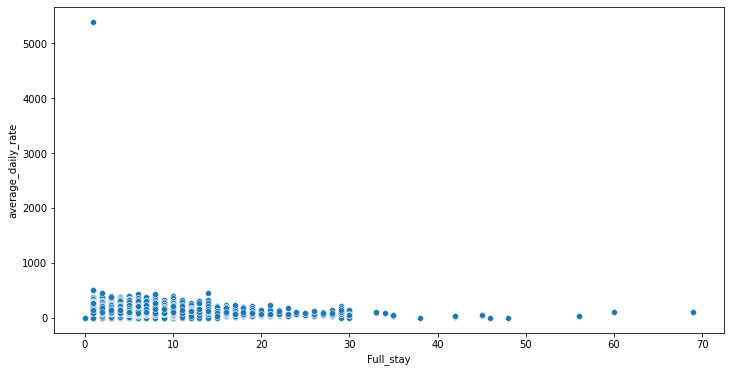

In [150]:
# Understanding the scenerio using the scatterplot.
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'average_daily_rate', x = 'Full_stay', data = hotel_df)
plt.show()

Removing an outlier from average_daily_rate column

In [151]:
# Removing all the values greater than 5000.
hotel_df.drop(hotel_df[hotel_df['average_daily_rate'] > 5000].index, inplace = True)

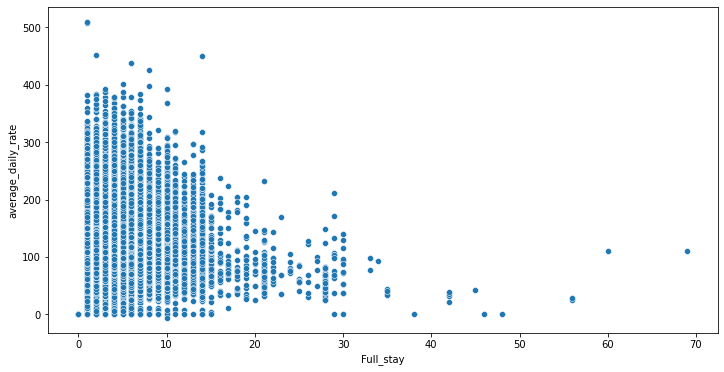

In [152]:
# Replotting the scatterplot after removing the outlier.
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'average_daily_rate', x = 'Full_stay', data = hotel_df)
plt.show()

From the above scatter plot we can conclude that as the length of full_stay increases the average_daily_rate decreases. This means that, the longer the stay - better the deal for the customers.

# Preparing data for the correlation chart between different coloumns

In [153]:
# We are removing this outliers for people staying in the hotels.
# 1} If someone stays more than 5 days in weekend nights then that data will not be taken into the consideration 
hotel_df.loc[hotel_df.stays_in_weekend_nights >= 5,'stays_in_weekend_nights']= 5
# 2} If someone stays more than or equal to 10 days in week nights then this data is also not be taken into the consideration 
hotel_df.loc[hotel_df.stays_in_week_nights >= 10,'stays_in_week_nights']= 10 
# 3} If the total members exceeds 20 then that will not taken into the consideration.
hotel_df.loc[hotel_df.Total_members > 20, 'Total_members'] = 20


In [154]:
# Creating the subset dataframes of both yhe hotels.
City_df =pd.DataFrame(hotel_df[hotel_df['hotel'] =='City Hotel'])
Resort_df =pd.DataFrame(hotel_df[hotel_df['hotel'] =='Resort Hotel'])

Lets  find the correlation between the numerical data.
Also, we have added Full_stay and Total_members columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns.

In [155]:
Corr_df = hotel_df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','average_daily_rate','required_car_parking_spaces','total_of_special_requests','Full_stay','Total_members']]

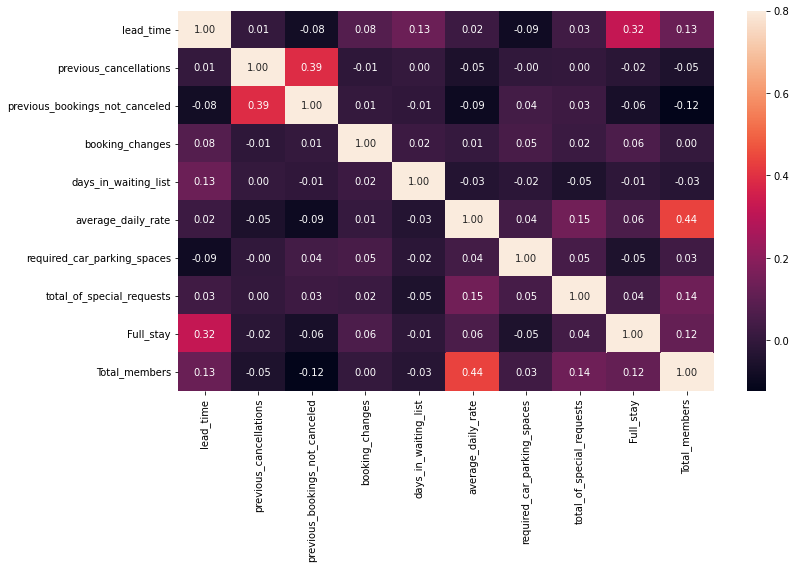

In [156]:
corr_mat = Corr_df.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corr_mat,vmax=0.8,annot = True,fmt='.2f');

1--> Full_stay length and lead_time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival date.

2--> average_daily_rate is slightly correlated with Total_members, which makes sense as more no. of people means more revenue, therefore less average_daily_rate.

#  EDA

There are two types of hotels in the data 'City' and 'Resort'.

In [157]:
Hotel_typ =hotel_df['hotel'].value_counts()
Hotel_typ

City Hotel      53273
Resort Hotel    33956
Name: hotel, dtype: int64

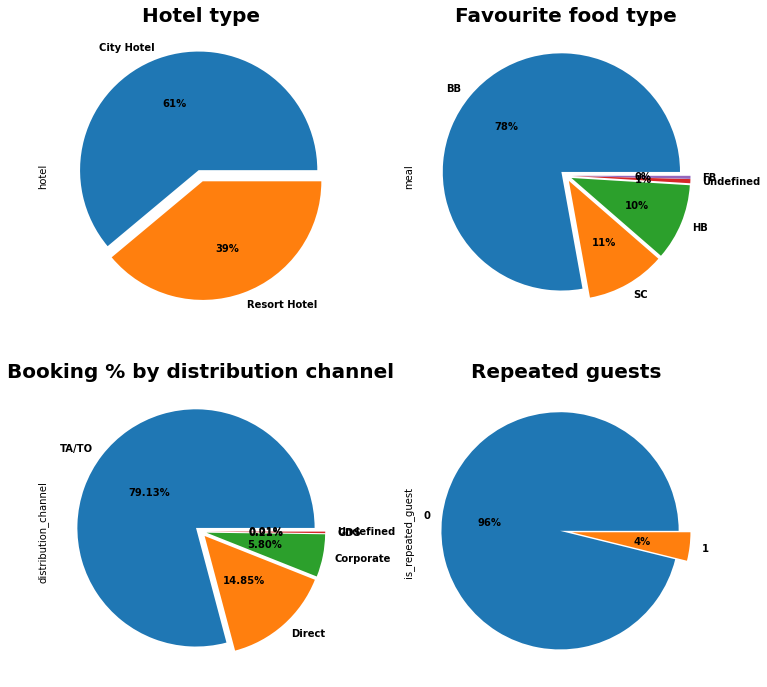

In [158]:
# Subplot for the 'Types of Hotels'
plt.subplot(2,2,1 )
Hotel_typ.plot.pie(x='City Hotel', y ='Resort Hotel',autopct='%1.0f%%',textprops={'weight': 'bold'},figsize =(12,12),explode =[0.05]*2) 
plt.title('Hotel type',fontweight="bold", size=20)

# Subplot for the 'Meal types'
plt.subplot(2,2,2 )
meal_typ =hotel_df['meal'].value_counts()
meal_typ.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'},explode = [0.05]*5)
plt.title('Favourite food type',fontweight="bold", size=20)

# Subplot for the 'Distribution Channel'
plt.subplot(2,2,3 )
booking_distibution_typ =hotel_df['distribution_channel'].value_counts()
booking_distibution_typ.plot.pie(autopct='%.2f%%',textprops={'weight': 'bold'}, pctdistance=0.5,explode = [0.05]*5)
plt.title('Booking % by distribution channel', fontweight ='bold', size =20);

# Subplot for the 'Repeated Guests'
plt.subplot(2,2,4)
Repeated = hotel_df.is_repeated_guest .value_counts()
Repeated.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'},explode = [0.05]*2)
plt.title('Repeated guests', fontweight ='bold', size =20);


1--> As we can see the most of the Guests prefferd **City hotel** over the **resort hotel**

2--> Hotel Meals abbreviations and their full forms'

**BB** --bed and breakfast. 

**HB** --half board (in which breakfast and dinner are included.)

**FB**--full board (in which breakfast, lunch and dinner are included.)

The most of the people prefers **'BB'** type of meal.

3-->Nearly 79% people prefer **'TA/TO'** for booking

4-->only **4%** people are **repeated guests**. The guest retention rate is **'*very low*'**.

Text(0.5, 1.0, 'required_parking_spaces')

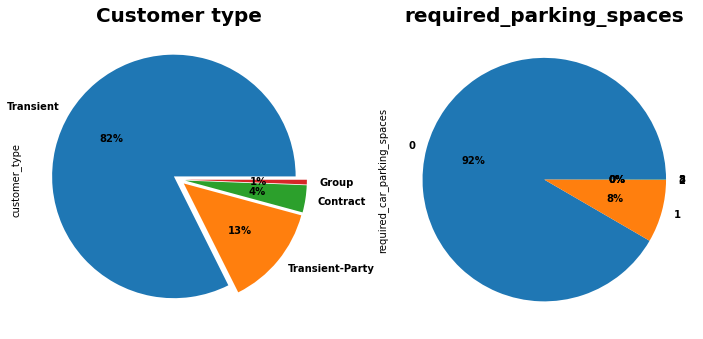

In [159]:
# Subplot for Customer Types
hotel_df.customer_type.nunique()
Customer_typ =hotel_df.customer_type .value_counts()
plt.figure(figsize =(12,12))
plt.subplot(1,2,1 )
Customer_typ.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'},explode =[0.05]*4) 
plt.title('Customer type',fontweight="bold", size=20)
# Subplot for required parking spaces
plt.subplot(1,2,2)
Car_parking_spaces = hotel_df.required_car_parking_spaces.value_counts()
Car_parking_spaces.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'})
plt.title('required_parking_spaces',fontweight="bold", size=20)

1--> There are 4 types of Customers. Out of which mostly are from **Transient Type**

2--> Only **8%** people require parking spaces

# Hotel Wise Bookings based on Date Month and year

Text(0.5, 1.0, ' bookings by year')

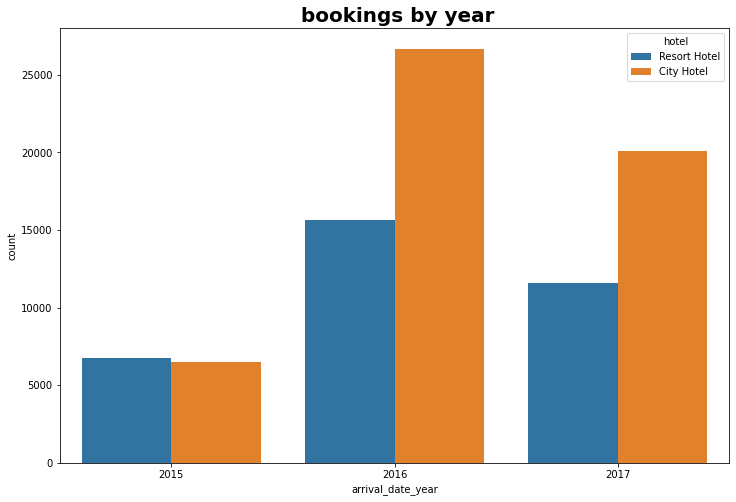

In [160]:
# Plotting the graph for Arrival date year of both types of hotel.
plt.figure(figsize = (12,8))
sns.countplot(x= 'arrival_date_year', data= hotel_df, hue= 'hotel').set_title (' bookings by year',fontweight="bold", size=20)


1}--> Bookings for city hotels are higher than resort hotels by considering every years data except the year 2015

2}--> In the year 2016 both the hotels have the highest number of guests. 

In [161]:
# Arrival of guests in particular month in city hotel
City_df.arrival_date_month.value_counts()

August       6576
July         5730
May          5402
April        5072
June         4997
March        4832
September    4232
October      4197
February     3591
December     2998
November     2922
January      2724
Name: arrival_date_month, dtype: int64

In [162]:
# Arrival of guests in particular month in resort hotel
Resort_df.arrival_date_month.value_counts()

August       4666
July         4313
May          2942
April        2828
June         2759
October      2724
March        2656
February     2492
September    2450
December     2114
November     2051
January      1961
Name: arrival_date_month, dtype: int64

Text(0.5, 1.0, ' bookings by month')

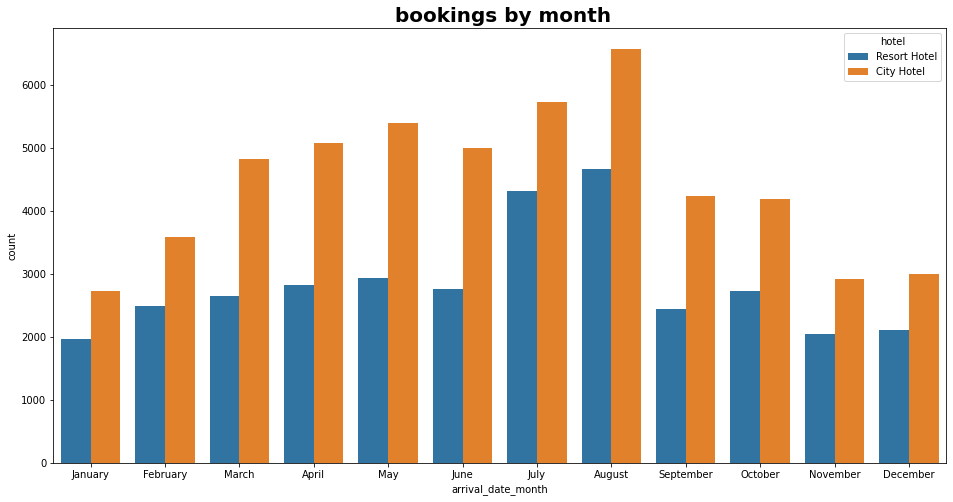

In [163]:
# Here firstly we will oreder the months of the year in proper sequence.
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
hotel_df['arrival_date_month'] = pd.Categorical(hotel_df['arrival_date_month'], categories=months, ordered=True)
# Plotting a graph for the month wise arrivals of guests.
plt.figure(figsize = (16,8))
sns.countplot(x= 'arrival_date_month', data= hotel_df, hue= 'hotel').set_title (' bookings by month',fontweight="bold", size=20)



Both the hotels are too much busy in the **2nd and 3rd quarter** of the year with **'*August*'** being the highest of all


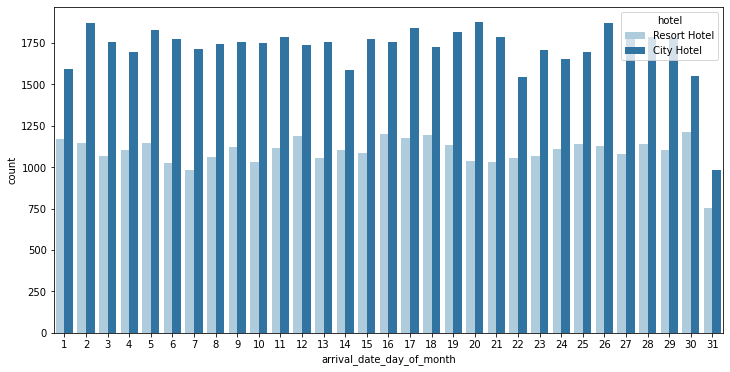

In [164]:
# Plotting the graph for arrival of the guest on the day of month
plt.figure(figsize=(12,6))
sns.countplot(data = hotel_df, x = 'arrival_date_day_of_month', hue='hotel', palette='Paired')
plt.show()

Here we can conclude that the bookings in the month end are least. But that not true because as every month didn't have the 31 days thats why we see the less number of arrivals in the month end

Text(0, 0.5, 'Number of guest')

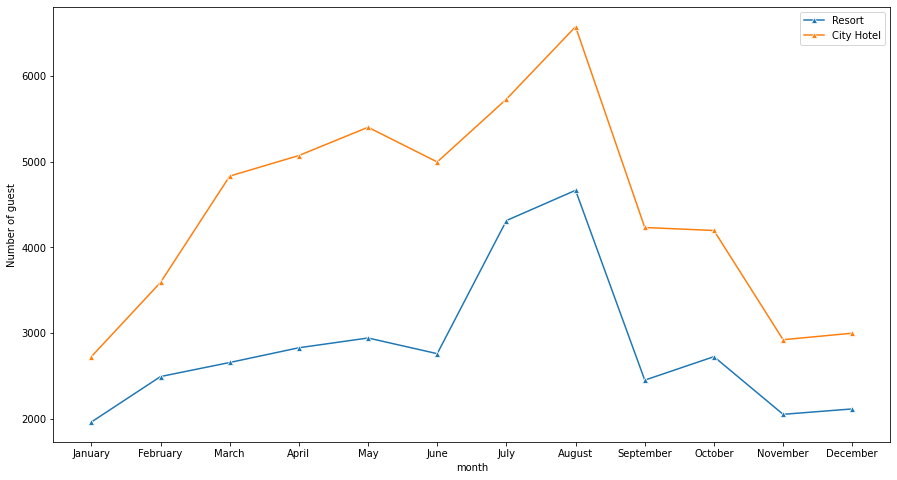

In [165]:
# Here we are extracting the data from the coloum of arriavl date month for resort hotel.
resort_guest = Resort_df['arrival_date_month'].value_counts().reset_index() 
resort_guest.columns=['month','no of guests']
resort_guest

# Here we are extracting the data from the coloum of arriavl date month for city hotel.
city_guest = City_df['arrival_date_month'].value_counts().reset_index()
city_guest.columns=['month','no of guests']
city_guest

# Now we are merging the data month wise for line graph.
final_guest=resort_guest.merge(city_guest, on = 'month')                              
final_guest.columns=['month','no of guests in resort','no of guest in city hotel']
final_guest
# But before this we have to order the months of the year chronological order.
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_guest['month'] = pd.Categorical(final_guest['month'], categories=months, ordered=True)

# Now here we are plotting a Line chart of both the hotels by the arrival month of the guests.
plt.figure(figsize =(15,8))
sns.lineplot(data=final_guest, x='month', y='no of guests in resort', marker ='^')
sns.lineplot(data=final_guest, x='month', y='no of guest in city hotel',marker ='^')
plt.legend(['Resort','City Hotel'])
plt.ylabel('Number of guest')

From the above line chart we can conlude that the months of **May, June ,July and August** are the busy ones

# From which country most of the guests are

Text(0.5, 1.0, 'Number of bookings country wise')

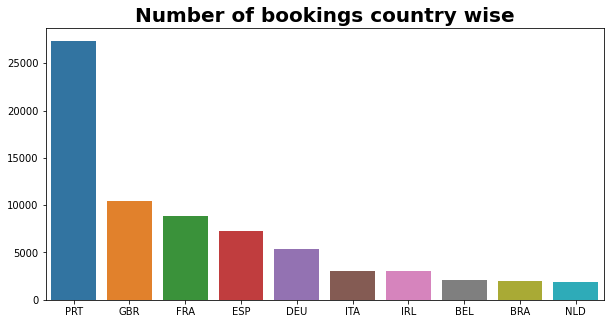

In [166]:
# Here are plotting the no. of guests from the different countries.
plt.figure(figsize = (10,5))
sns.barplot (y= list(hotel_df.country.value_counts().head (10)), x= list(hotel_df.country.value_counts().head(10).index))
plt.title("Number of bookings country wise",fontweight="bold", size=20)

Most no. of guest are from Portugal and other Europian contries.

# Total  members per booking

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


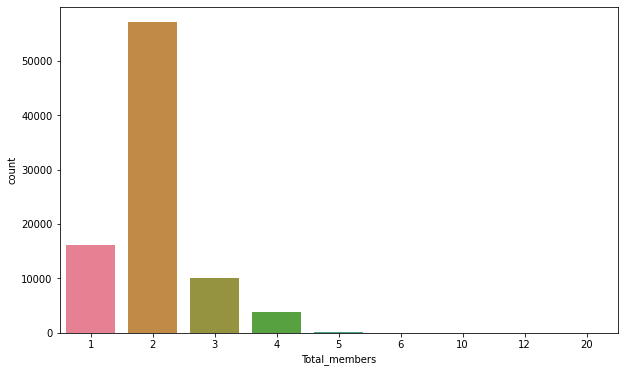

In [167]:
# Plotting a bar graph for total members
plt.figure(figsize=(10,6))
sns.countplot(hotel_df['Total_members'], palette='husl')
plt.show()

Most peoples like to come in pairs.



# Which agent made the maximum bookings ?

Text(0.5, 1.0, 'No. of bookings done by agents')

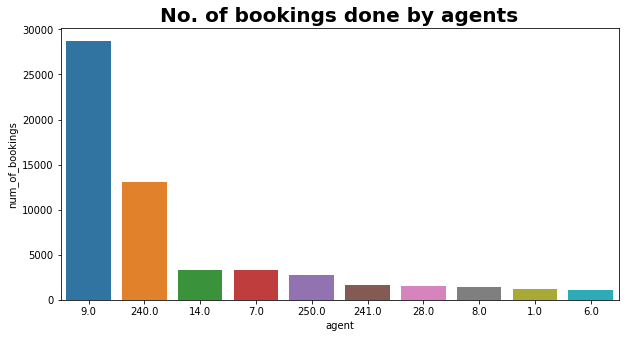

In [168]:
agent_df = pd.DataFrame(hotel_df['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)

# 0 represents that booking is not made by an agent.
agent_df.drop(agent_df[agent_df['agent'] == 0].index, inplace = True)  

# Selecting top 10 performing agents.
agent_df = agent_df[:10]  

# Plotting a garph for the no. of booking made by the agents.
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = agent_df, order = agent_df.sort_values('num_of_bookings' ,ascending = False).agent)
plt.title( 'No. of bookings done by agents',fontweight="bold", size=20)

Agent no. 9 has made most no. of bookings.

# Most preferred Room type

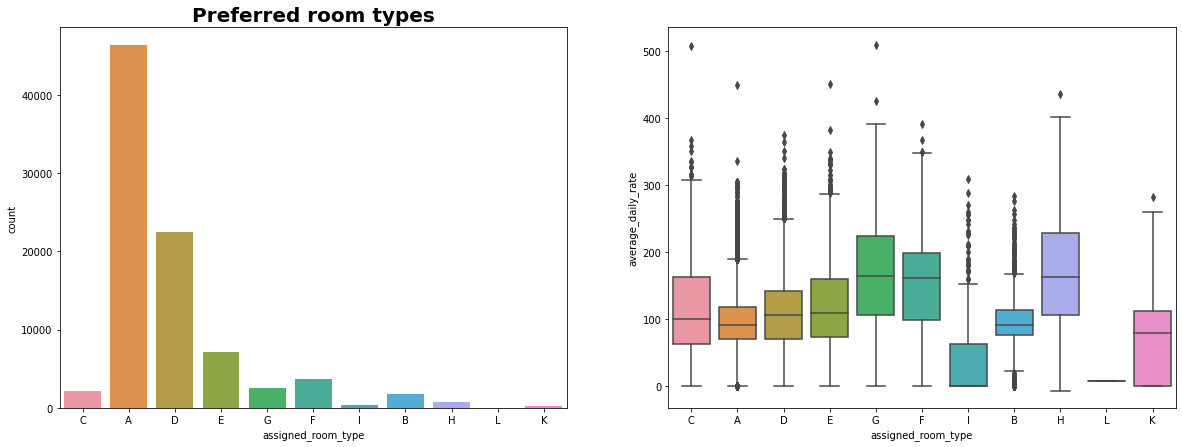

In [169]:
# Plotting a subplot for preffered room types
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
sns.countplot( x = hotel_df['assigned_room_type'])
plt.title('Preferred room types',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.boxplot(x = hotel_df['assigned_room_type'], y = hotel_df['average_daily_rate'])

Room types A and D are most the one which are most preferred by guests.

But 'Average daily rate' is good for the  rooms  of type H,G,F and C. 

# Stay_length in hotels

Text(0.5, 1.0, 'Stay length in hotels')

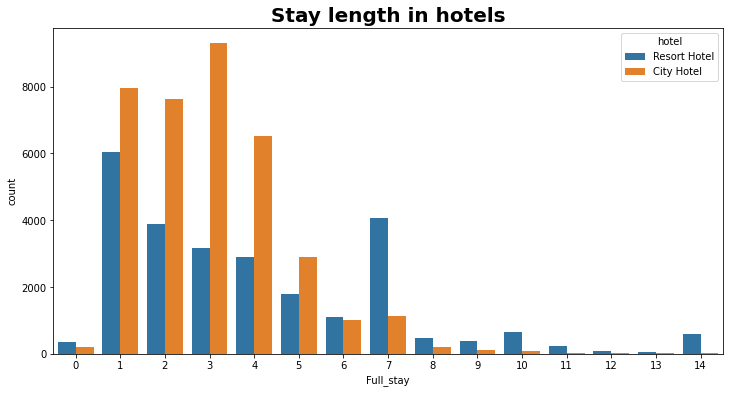

In [170]:
# Considering the data of only the peoples who didnt canceled the bookings
not_canceled = hotel_df[hotel_df['is_canceled'] == 0]

 # limiting full stay to less than 15
s1 = not_canceled[not_canceled['Full_stay'] < 15]   

# Plotting a graph of both hotels for staying length
plt.figure(figsize = (12,6))
sns.countplot(x = s1['Full_stay'], hue = s1['hotel'])
plt.title('Stay length in hotels',fontweight="bold", size=20)

Most common stay length is less than or equal to 4 days

Generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

# No. of guests staying at weekends and weekdays in both hotels

Text(0.5, 1.0, 'Number of stays on weekday nights')

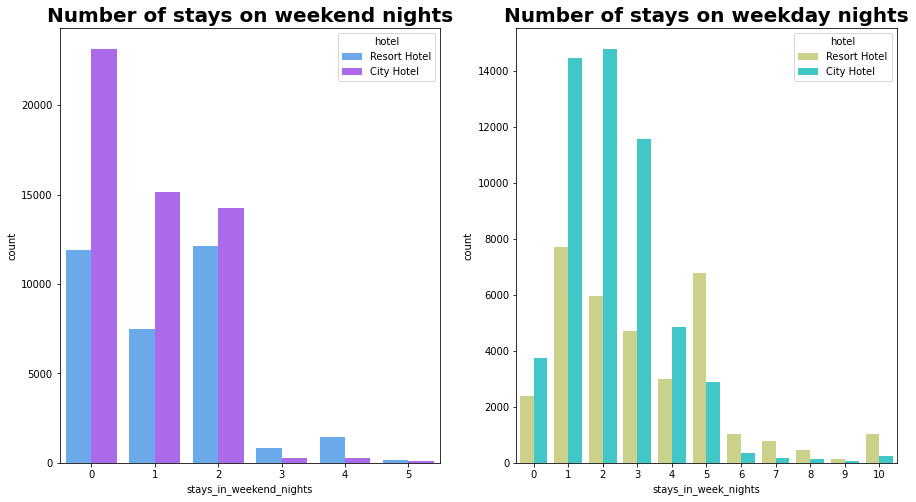

In [171]:
# Plotting a subplot graph for the no. of stays in weekends.
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='stays_in_weekend_nights',hue='hotel', data=hotel_df, palette='cool')
plt.title("Number of stays on weekend nights",fontweight="bold", size=20)

# Plotting a subplot graph for the no. of stays in weekdays.
plt.subplot(1, 2, 2)
sns.countplot(x='stays_in_week_nights',hue='hotel', data=hotel_df, palette='rainbow_r')
plt.title("Number of stays on weekday nights",fontweight="bold", size=20)

**City hotels** have more number of stays irrespective of week or weekend stays.

# Average Daily Rates of bothe the hotels

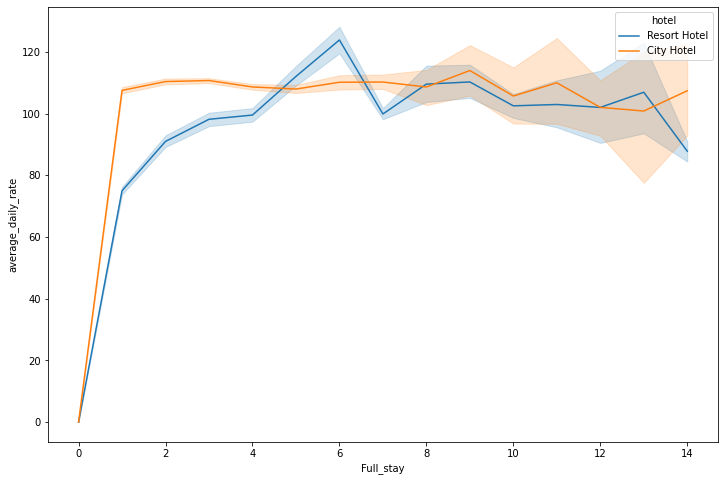

In [172]:
# Considering only the bookings which are not canceled
not_canceled = hotel_df[hotel_df['is_canceled'] == 0]

 # Taking less than 15 days of Full stay
s1 = not_canceled[not_canceled['Full_stay'] < 15]  

# Plotting a line plot for average dail rate.
plt.figure(figsize =(12,8))
sns.lineplot(data = hotel_df, x = s1['Full_stay'], y = 'average_daily_rate', hue = 'hotel')


After 2 days average_daily_rate for both the hotels is in range 100 to 130.

To get min. average_daily_rate for resort hotel you should plan a stay of 6-7 days.

For city hotels is almost constant.

An average_daily_rate goes down after 14 days(long stay).

# Cancellation rates 

Text(0.5, 1.0, 'Booking preferred with deposite type')

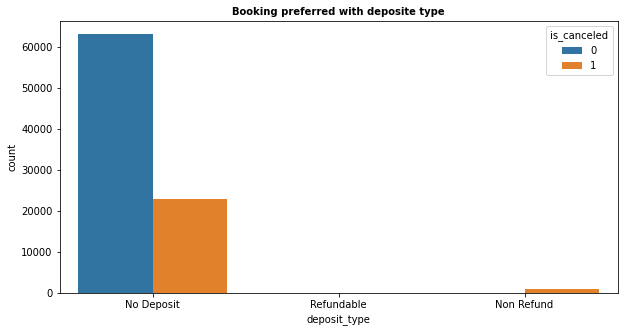

In [173]:
# Plotting a graph for the canceled bookings
plt.figure(figsize = (10,5))
sns.countplot(x='deposit_type',data=hotel_df,hue ='is_canceled')
plt.title('Booking preferred with deposite type',fontweight ="bold",size =10)

As expected , almost every booking is done with **'No deposit'**.

Most cancellations are also in **'no deposit'** bookings. 

It is a surprise to see cancellations with **'Non-refundable'** bookings.

# Cancellations rates by hotel types and lead time

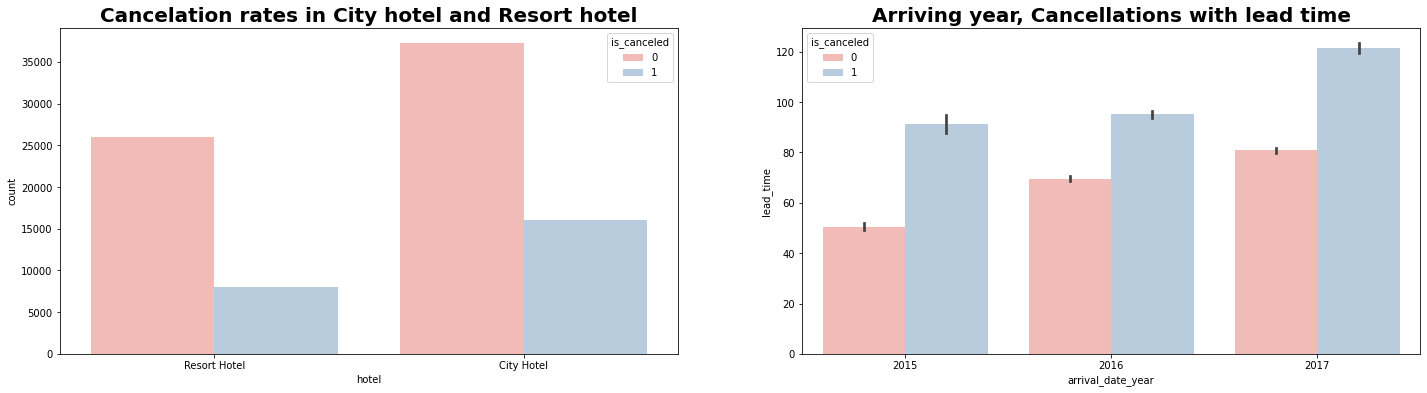

In [174]:
# Plotting a subplot graph for cancelled hotels of both types.
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1 )
sns.countplot(x='hotel',hue="is_canceled", data=hotel_df,palette='Pastel1')
plt.title("Cancelation rates in City hotel and Resort hotel",fontweight="bold", size=20)

# Plotting a subplot graph for cancellations on lead time.
plt.subplot(1,2,2 )
sns.barplot(x='arrival_date_year', y='lead_time',hue='is_canceled', data= hotel_df, palette='Pastel1')
plt.title('Arriving year, Cancellations with lead time',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

Cancelation rate is higher in **city hotel**.

 With more ***lead time*** there is more possibility of **booking cancellation**. 

# Waiting time

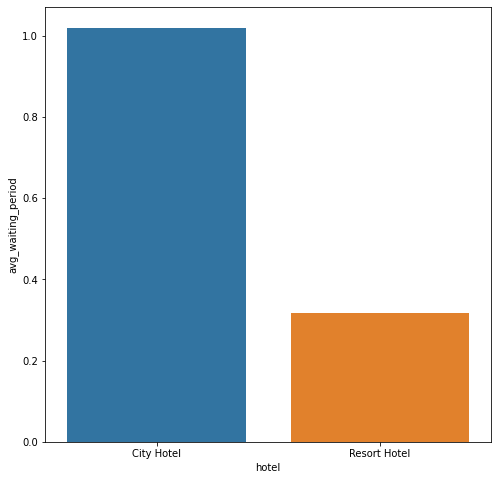

In [182]:
 # Creating a DF which store groupby 'Hotel' rows
grouped_by_hotel = hotel_df.groupby('hotel')

# waiting_df which stores mean of days in waiting list column
Waiting_df = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,8))
sns.barplot(x = Waiting_df['hotel'], y = Waiting_df['avg_waiting_period'] )
plt.show()


City hotel has significantly *longer* **waiting time**, hence ***City Hotel*** is much busier than ***Resort Hotel***.

# average_daily_rate and price

Text(0.5, 1.0, 'Average daily rate month wise')

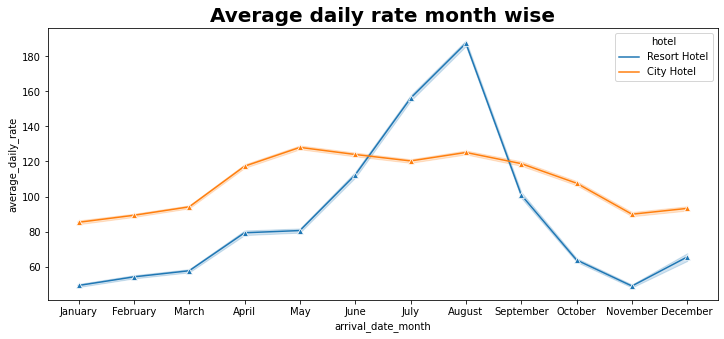

In [176]:
# Plotting a line chart for average daily rate month wise
plt.figure(figsize=(12,5))
sns.lineplot(data = hotel_df, x = 'arrival_date_month', y = 'average_daily_rate', hue = 'hotel',sort =True, marker ='^')
plt.title('Average daily rate month wise',fontweight ='bold',size =20)

For resort hotels, the average daily rate is ***more expensive*** during **July, August, and September.**

For city hotels, the average daily rate is ***more expensive*** during **May, June, July and August**

# Calculating average daily rate per person

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


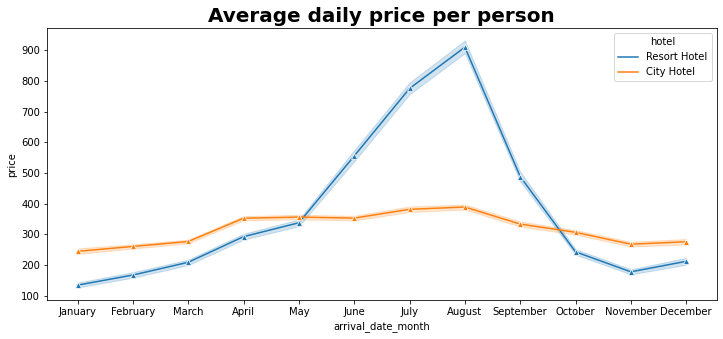

In [177]:
# Plotting a graph for average daily rate per person
plt.figure(figsize=(12,5))
hotel_df['average_daily_rate_pp'] = hotel_df['average_daily_rate'] / (hotel_df['adults'] + hotel_df['children']) 
Actual_guests = hotel_df.loc[hotel_df["is_canceled"] == 0]
Actual_guests['price'] = Actual_guests['average_daily_rate'] * (Actual_guests['Full_stay'])
sns.lineplot(data = Actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel', marker ='^')
plt.title('Average daily price per person',fontweight ='bold', size =20)
plt.show()

Prices of resort hotel are ***much higher*** during **May, June, July, August and September**

Prices of city hotel do not ***fluctuate*** that much.

# Special Requests

In [178]:
hotel_df['total_of_special_requests'].value_counts()

0    43788
1    28976
2    11795
3     2314
4      320
5       36
Name: total_of_special_requests, dtype: int64

Text(0.5, 0, 'No. of special requests')

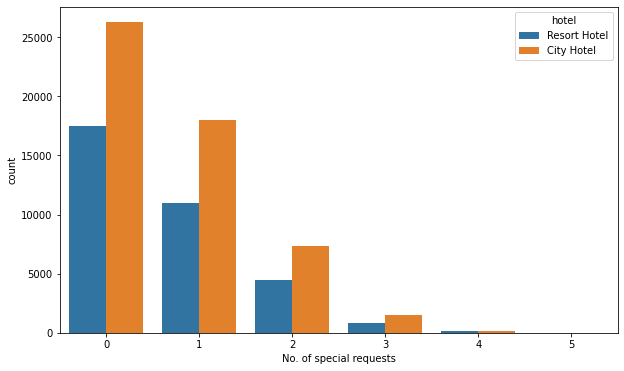

In [179]:
plt.figure(figsize =(10,6))
sns.countplot(data =hotel_df,x ='total_of_special_requests', hue ='hotel')
plt.xlabel('No. of special requests')

City hotels have more no. of special requests. Most of them ask for only 1 special request.

In [180]:
hotel_df.Total_members.sum()

176868

176868 total members have been registered in the hotels

In [181]:
hotel_df.required_car_parking_spaces.sum()

7354

7354 car Parking spaces have been used

# Conclusion:

The majority of guests come from western europe countries.We should spend a significant amount of our budget on those area.

Around 61% bookings are for City hotel and 39% bookings are for Resort hotel, therefore City Hotel is busier than Resort hotel.

Majority of the hotels booked are city hotel. Definitely need to spend the most
targeting fund on those hotel.

We should also target months between May to Aug. Those are peak months due to the summer period.

Given that we do not have repeated guests, we should target our advertisement on guests to increase returning guests.

80% distribution_channel is TA/TO

Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

November,Descember, February And January are the months which has less booking so in this perios you can get rooms with less average daily rate. And Avoid most busiest months for hotels (May,June,July,August)
